In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import time

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = datasets.FashionMNIST('Data_FashionMNIST/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('DATA_FashionMNIST/', download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

cuda


In [11]:
training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)
print(type(images))
print(images.shape)
print(labels.shape)

# Function to show multiple images
def show_images(images, labels):
    fig = plt.figure()
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title("Label: {}".format(labels[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


## Linear MODEL

Epoch [1/150], Step [100/938], D_loss: 0.19078923016786575, G_loss: 3.549368381500244
Epoch [1/150], Step [200/938], D_loss: 0.7062997370958328, G_loss: 2.676203727722168
Epoch [1/150], Step [300/938], D_loss: 0.7183190584182739, G_loss: 1.7984570264816284
Epoch [1/150], Step [400/938], D_loss: 0.8298385739326477, G_loss: 1.1793763637542725
Epoch [1/150], Step [500/938], D_loss: 0.6308252811431885, G_loss: 1.2117419242858887
Epoch [1/150], Step [600/938], D_loss: 0.9338906407356262, G_loss: 1.4895682334899902
Epoch [1/150], Step [700/938], D_loss: 2.5903981924057007, G_loss: 1.8253920078277588
Epoch [1/150], Step [800/938], D_loss: 0.47274601459503174, G_loss: 2.5231170654296875
Epoch [1/150], Step [900/938], D_loss: 0.5674305111169815, G_loss: 2.7789347171783447
Epoch [2/150], Step [100/938], D_loss: 0.2877756506204605, G_loss: 3.2771637439727783
Epoch [2/150], Step [200/938], D_loss: 0.5948428809642792, G_loss: 3.1094603538513184
Epoch [2/150], Step [300/938], D_loss: 0.2071096077561

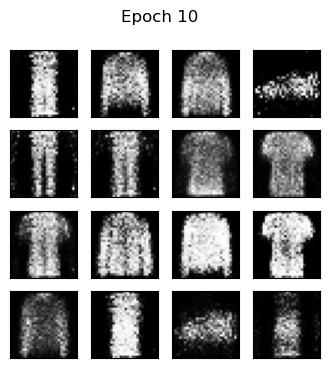

Epoch [11/150], Step [100/938], D_loss: 0.9379938840866089, G_loss: 1.6128265857696533
Epoch [11/150], Step [200/938], D_loss: 0.8429874777793884, G_loss: 1.4279730319976807
Epoch [11/150], Step [300/938], D_loss: 0.8732364177703857, G_loss: 1.607511281967163
Epoch [11/150], Step [400/938], D_loss: 1.0620381832122803, G_loss: 2.0612523555755615
Epoch [11/150], Step [500/938], D_loss: 1.151626855134964, G_loss: 1.2523798942565918
Epoch [11/150], Step [600/938], D_loss: 0.8015580773353577, G_loss: 1.6018579006195068
Epoch [11/150], Step [700/938], D_loss: 0.8338033556938171, G_loss: 1.2392730712890625
Epoch [11/150], Step [800/938], D_loss: 0.967365175485611, G_loss: 1.3252780437469482
Epoch [11/150], Step [900/938], D_loss: 0.8606047630310059, G_loss: 2.012118101119995
Epoch [12/150], Step [100/938], D_loss: 1.0147359371185303, G_loss: 1.2906278371810913
Epoch [12/150], Step [200/938], D_loss: 1.0446537733078003, G_loss: 1.8213200569152832
Epoch [12/150], Step [300/938], D_loss: 0.90156

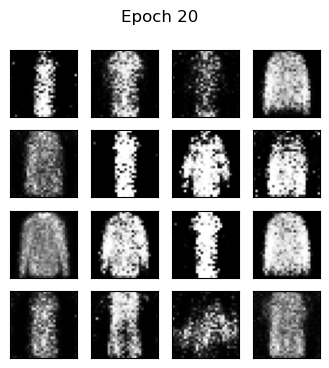

Epoch [21/150], Step [100/938], D_loss: 1.0783308744430542, G_loss: 1.1441038846969604
Epoch [21/150], Step [200/938], D_loss: 0.8869828879833221, G_loss: 1.4592288732528687
Epoch [21/150], Step [300/938], D_loss: 1.2726972103118896, G_loss: 1.4287539720535278
Epoch [21/150], Step [400/938], D_loss: 1.1705875396728516, G_loss: 1.5656065940856934
Epoch [21/150], Step [500/938], D_loss: 1.263346642255783, G_loss: 1.2095534801483154
Epoch [21/150], Step [600/938], D_loss: 0.9178400933742523, G_loss: 1.218959093093872
Epoch [21/150], Step [700/938], D_loss: 0.8169309198856354, G_loss: 1.4417163133621216
Epoch [21/150], Step [800/938], D_loss: 1.0119114816188812, G_loss: 1.3729972839355469
Epoch [21/150], Step [900/938], D_loss: 1.1266035437583923, G_loss: 1.1349472999572754
Epoch [22/150], Step [100/938], D_loss: 1.2077112793922424, G_loss: 1.0185997486114502
Epoch [22/150], Step [200/938], D_loss: 1.0549707114696503, G_loss: 1.2716093063354492
Epoch [22/150], Step [300/938], D_loss: 0.974

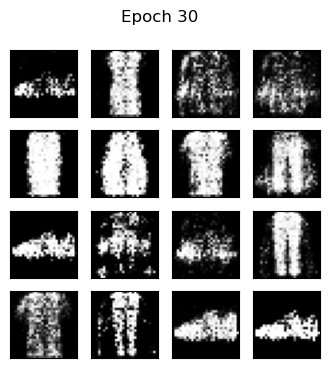

Epoch [31/150], Step [100/938], D_loss: 0.8889322280883789, G_loss: 1.3581933975219727
Epoch [31/150], Step [200/938], D_loss: 0.9928348660469055, G_loss: 1.3540133237838745
Epoch [31/150], Step [300/938], D_loss: 1.033420741558075, G_loss: 1.0474849939346313
Epoch [31/150], Step [400/938], D_loss: 1.163802444934845, G_loss: 1.0318588018417358
Epoch [31/150], Step [500/938], D_loss: 1.0924891233444214, G_loss: 1.1827219724655151
Epoch [31/150], Step [600/938], D_loss: 1.3977500796318054, G_loss: 1.12301504611969
Epoch [31/150], Step [700/938], D_loss: 1.1882211565971375, G_loss: 1.0938822031021118
Epoch [31/150], Step [800/938], D_loss: 1.1117896735668182, G_loss: 1.2461177110671997
Epoch [31/150], Step [900/938], D_loss: 1.219989001750946, G_loss: 1.1897047758102417
Epoch [32/150], Step [100/938], D_loss: 1.26934015750885, G_loss: 1.115153431892395
Epoch [32/150], Step [200/938], D_loss: 0.9295772314071655, G_loss: 1.215625524520874
Epoch [32/150], Step [300/938], D_loss: 1.0214069485

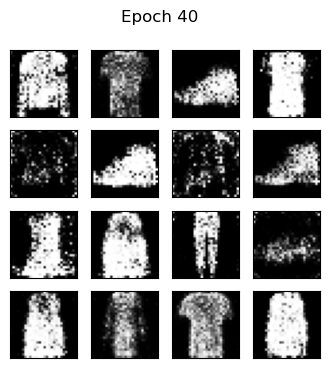

Epoch [41/150], Step [100/938], D_loss: 1.0486652255058289, G_loss: 1.1403422355651855
Epoch [41/150], Step [200/938], D_loss: 0.9661908745765686, G_loss: 1.0969271659851074
Epoch [41/150], Step [300/938], D_loss: 1.2720622420310974, G_loss: 1.0025584697723389
Epoch [41/150], Step [400/938], D_loss: 0.8913056254386902, G_loss: 1.2592298984527588
Epoch [41/150], Step [500/938], D_loss: 1.339942753314972, G_loss: 1.1390167474746704
Epoch [41/150], Step [600/938], D_loss: 1.3587682843208313, G_loss: 1.014169692993164
Epoch [41/150], Step [700/938], D_loss: 1.0898817777633667, G_loss: 1.0969187021255493
Epoch [41/150], Step [800/938], D_loss: 1.2530752420425415, G_loss: 0.9807577133178711
Epoch [41/150], Step [900/938], D_loss: 1.1737627387046814, G_loss: 0.9733867049217224
Epoch [42/150], Step [100/938], D_loss: 1.2454282641410828, G_loss: 1.0524523258209229
Epoch [42/150], Step [200/938], D_loss: 1.22074693441391, G_loss: 1.0087544918060303
Epoch [42/150], Step [300/938], D_loss: 1.07389

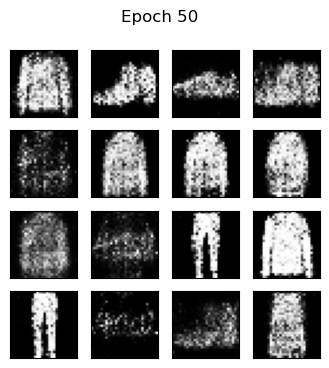

Epoch [51/150], Step [100/938], D_loss: 0.9763694703578949, G_loss: 1.1081953048706055
Epoch [51/150], Step [200/938], D_loss: 1.2975655794143677, G_loss: 0.8977546095848083
Epoch [51/150], Step [300/938], D_loss: 1.1201019883155823, G_loss: 1.3507936000823975
Epoch [51/150], Step [400/938], D_loss: 1.1582493782043457, G_loss: 1.1055095195770264
Epoch [51/150], Step [500/938], D_loss: 1.3053960800170898, G_loss: 0.9340828657150269
Epoch [51/150], Step [600/938], D_loss: 1.2094308733940125, G_loss: 0.9995505809783936
Epoch [51/150], Step [700/938], D_loss: 1.2278227806091309, G_loss: 0.9706758856773376
Epoch [51/150], Step [800/938], D_loss: 1.3508650064468384, G_loss: 0.9300121665000916
Epoch [51/150], Step [900/938], D_loss: 1.2258787155151367, G_loss: 1.1682171821594238
Epoch [52/150], Step [100/938], D_loss: 1.2451554536819458, G_loss: 1.1964466571807861
Epoch [52/150], Step [200/938], D_loss: 1.3037952184677124, G_loss: 0.9688422679901123
Epoch [52/150], Step [300/938], D_loss: 1.2

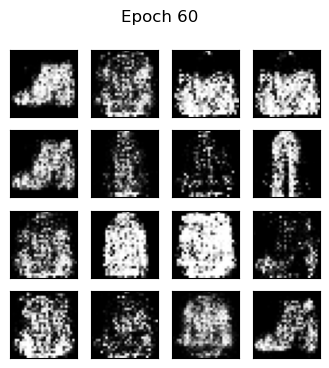

Epoch [61/150], Step [100/938], D_loss: 1.330608606338501, G_loss: 0.9706261157989502
Epoch [61/150], Step [200/938], D_loss: 1.2132092714309692, G_loss: 1.1145226955413818
Epoch [61/150], Step [300/938], D_loss: 1.1662214994430542, G_loss: 0.9721768498420715
Epoch [61/150], Step [400/938], D_loss: 1.2307225465774536, G_loss: 0.924083411693573
Epoch [61/150], Step [500/938], D_loss: 1.105099856853485, G_loss: 1.024721384048462
Epoch [61/150], Step [600/938], D_loss: 1.2135555744171143, G_loss: 1.0193655490875244
Epoch [61/150], Step [700/938], D_loss: 1.2250839471817017, G_loss: 1.058530569076538
Epoch [61/150], Step [800/938], D_loss: 1.2272673845291138, G_loss: 0.9526946544647217
Epoch [61/150], Step [900/938], D_loss: 1.512963056564331, G_loss: 1.0459063053131104
Epoch [62/150], Step [100/938], D_loss: 1.0894439816474915, G_loss: 1.0853630304336548
Epoch [62/150], Step [200/938], D_loss: 1.2145596742630005, G_loss: 1.0065391063690186
Epoch [62/150], Step [300/938], D_loss: 1.1861363

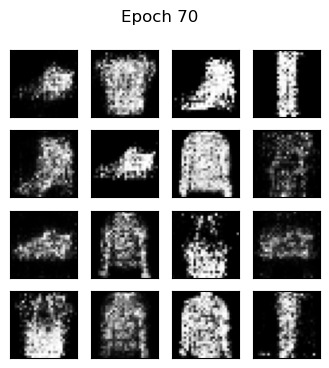

Epoch [71/150], Step [100/938], D_loss: 1.3011274933815002, G_loss: 0.9214540719985962
Epoch [71/150], Step [200/938], D_loss: 1.1926711797714233, G_loss: 0.9927754998207092
Epoch [71/150], Step [300/938], D_loss: 1.150462806224823, G_loss: 1.1059916019439697
Epoch [71/150], Step [400/938], D_loss: 1.0460503697395325, G_loss: 1.1647001504898071
Epoch [71/150], Step [500/938], D_loss: 1.2779998779296875, G_loss: 1.154024600982666
Epoch [71/150], Step [600/938], D_loss: 1.1578312516212463, G_loss: 0.990547776222229
Epoch [71/150], Step [700/938], D_loss: 1.083187758922577, G_loss: 1.1253646612167358
Epoch [71/150], Step [800/938], D_loss: 1.1521978378295898, G_loss: 0.9782660007476807
Epoch [71/150], Step [900/938], D_loss: 1.2559824585914612, G_loss: 1.2506351470947266
Epoch [72/150], Step [100/938], D_loss: 1.400235652923584, G_loss: 1.0043131113052368
Epoch [72/150], Step [200/938], D_loss: 1.3506625294685364, G_loss: 0.7775195837020874
Epoch [72/150], Step [300/938], D_loss: 1.210876

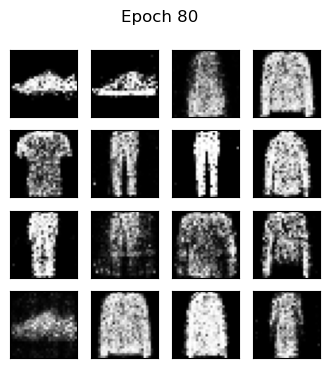

Epoch [81/150], Step [100/938], D_loss: 1.3905545473098755, G_loss: 0.9991729259490967
Epoch [81/150], Step [200/938], D_loss: 1.2325921654701233, G_loss: 0.9371548295021057
Epoch [81/150], Step [300/938], D_loss: 1.4036504030227661, G_loss: 0.9839447736740112
Epoch [81/150], Step [400/938], D_loss: 1.3436821103096008, G_loss: 0.9816973209381104
Epoch [81/150], Step [500/938], D_loss: 1.3039873242378235, G_loss: 1.0350362062454224
Epoch [81/150], Step [600/938], D_loss: 1.3180997967720032, G_loss: 0.9415323734283447
Epoch [81/150], Step [700/938], D_loss: 1.3022735714912415, G_loss: 0.9691867828369141
Epoch [81/150], Step [800/938], D_loss: 1.524797260761261, G_loss: 0.7986465692520142
Epoch [81/150], Step [900/938], D_loss: 1.390375018119812, G_loss: 0.8054993152618408
Epoch [82/150], Step [100/938], D_loss: 1.1865767240524292, G_loss: 1.131965160369873
Epoch [82/150], Step [200/938], D_loss: 1.150001049041748, G_loss: 1.0337525606155396
Epoch [82/150], Step [300/938], D_loss: 1.32518

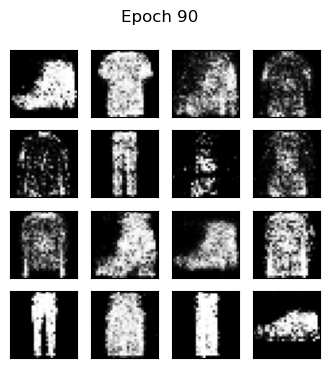

Epoch [91/150], Step [100/938], D_loss: 1.225738525390625, G_loss: 1.0060001611709595
Epoch [91/150], Step [200/938], D_loss: 1.0610140562057495, G_loss: 1.053183913230896
Epoch [91/150], Step [300/938], D_loss: 1.3541984558105469, G_loss: 0.8100724816322327
Epoch [91/150], Step [400/938], D_loss: 1.187550961971283, G_loss: 0.9492933750152588
Epoch [91/150], Step [500/938], D_loss: 1.2867671251296997, G_loss: 0.9107815027236938
Epoch [91/150], Step [600/938], D_loss: 1.3742108941078186, G_loss: 0.7921730875968933
Epoch [91/150], Step [700/938], D_loss: 1.4495595693588257, G_loss: 0.7747231721878052
Epoch [91/150], Step [800/938], D_loss: 1.3239220976829529, G_loss: 0.8307746052742004
Epoch [91/150], Step [900/938], D_loss: 1.2280207872390747, G_loss: 1.0413501262664795
Epoch [92/150], Step [100/938], D_loss: 1.4103702306747437, G_loss: 0.8915529251098633
Epoch [92/150], Step [200/938], D_loss: 1.4709272980690002, G_loss: 0.9063671827316284
Epoch [92/150], Step [300/938], D_loss: 1.2205

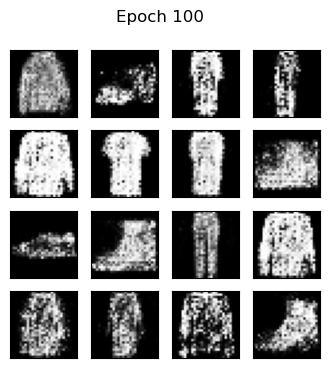

Epoch [101/150], Step [100/938], D_loss: 1.1729443073272705, G_loss: 0.9289382696151733
Epoch [101/150], Step [200/938], D_loss: 1.2688917517662048, G_loss: 0.8522241115570068
Epoch [101/150], Step [300/938], D_loss: 1.2924243807792664, G_loss: 0.8416091203689575
Epoch [101/150], Step [400/938], D_loss: 1.3741830587387085, G_loss: 0.9015426635742188
Epoch [101/150], Step [500/938], D_loss: 1.3714401125907898, G_loss: 0.8716294765472412
Epoch [101/150], Step [600/938], D_loss: 1.2522363066673279, G_loss: 0.9605556726455688
Epoch [101/150], Step [700/938], D_loss: 1.225250244140625, G_loss: 0.9126695394515991
Epoch [101/150], Step [800/938], D_loss: 1.1143932938575745, G_loss: 0.8917418718338013
Epoch [101/150], Step [900/938], D_loss: 1.1324570775032043, G_loss: 1.1575100421905518
Epoch [102/150], Step [100/938], D_loss: 1.652480959892273, G_loss: 0.9176803827285767
Epoch [102/150], Step [200/938], D_loss: 1.2449460625648499, G_loss: 1.0119832754135132
Epoch [102/150], Step [300/938], D

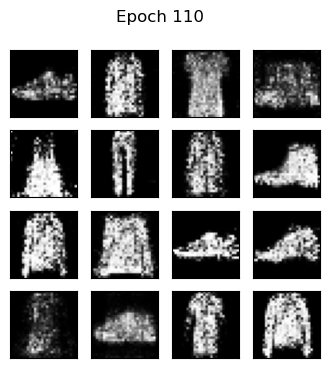

Epoch [111/150], Step [100/938], D_loss: 1.4735228419303894, G_loss: 0.8446683883666992
Epoch [111/150], Step [200/938], D_loss: 1.2635821104049683, G_loss: 0.8110623955726624
Epoch [111/150], Step [300/938], D_loss: 1.2917014956474304, G_loss: 0.8799163103103638
Epoch [111/150], Step [400/938], D_loss: 1.3664273023605347, G_loss: 0.8245411515235901
Epoch [111/150], Step [500/938], D_loss: 1.3526755571365356, G_loss: 0.7684394717216492
Epoch [111/150], Step [600/938], D_loss: 1.4146095514297485, G_loss: 0.7861779928207397
Epoch [111/150], Step [700/938], D_loss: 1.4598339796066284, G_loss: 0.9683164358139038
Epoch [111/150], Step [800/938], D_loss: 1.4858304262161255, G_loss: 0.7364526987075806
Epoch [111/150], Step [900/938], D_loss: 1.3091776371002197, G_loss: 1.0336353778839111
Epoch [112/150], Step [100/938], D_loss: 1.2783553004264832, G_loss: 0.8353285789489746
Epoch [112/150], Step [200/938], D_loss: 1.3315085172653198, G_loss: 0.849419355392456
Epoch [112/150], Step [300/938], 

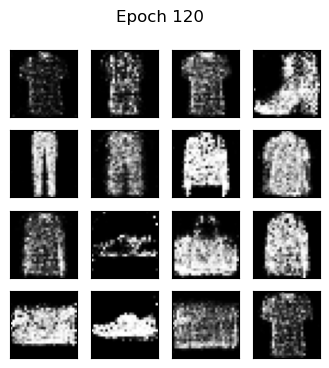

Epoch [121/150], Step [100/938], D_loss: 1.1321290135383606, G_loss: 1.0388410091400146
Epoch [121/150], Step [200/938], D_loss: 1.3177345395088196, G_loss: 0.8766981363296509
Epoch [121/150], Step [300/938], D_loss: 1.193310558795929, G_loss: 0.9919940233230591
Epoch [121/150], Step [400/938], D_loss: 1.2803899645805359, G_loss: 0.9105952382087708
Epoch [121/150], Step [500/938], D_loss: 1.4629470109939575, G_loss: 0.9638634920120239
Epoch [121/150], Step [600/938], D_loss: 1.2720777988433838, G_loss: 0.894569993019104
Epoch [121/150], Step [700/938], D_loss: 1.3278483152389526, G_loss: 0.8242919445037842
Epoch [121/150], Step [800/938], D_loss: 1.3755478262901306, G_loss: 0.8002424836158752
Epoch [121/150], Step [900/938], D_loss: 1.3148401975631714, G_loss: 0.8875105381011963
Epoch [122/150], Step [100/938], D_loss: 1.1544652581214905, G_loss: 0.967254638671875
Epoch [122/150], Step [200/938], D_loss: 1.3544629216194153, G_loss: 0.8021981120109558
Epoch [122/150], Step [300/938], D_

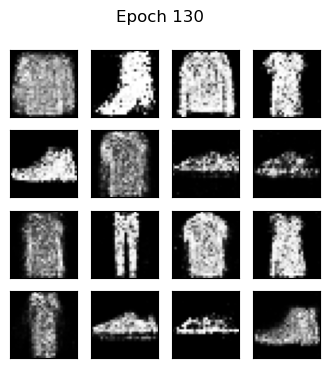

Epoch [131/150], Step [100/938], D_loss: 1.323321521282196, G_loss: 0.8162533640861511
Epoch [131/150], Step [200/938], D_loss: 1.5374614000320435, G_loss: 0.8016378283500671
Epoch [131/150], Step [300/938], D_loss: 1.2689972519874573, G_loss: 0.8649108409881592
Epoch [131/150], Step [400/938], D_loss: 1.5033619403839111, G_loss: 0.8892684578895569
Epoch [131/150], Step [500/938], D_loss: 1.3728552460670471, G_loss: 0.7934698462486267
Epoch [131/150], Step [600/938], D_loss: 1.312913417816162, G_loss: 0.9761885404586792
Epoch [131/150], Step [700/938], D_loss: 1.488348126411438, G_loss: 0.779968798160553
Epoch [131/150], Step [800/938], D_loss: 1.37870192527771, G_loss: 0.8397078514099121
Epoch [131/150], Step [900/938], D_loss: 1.3085022568702698, G_loss: 1.015608787536621
Epoch [132/150], Step [100/938], D_loss: 1.389462947845459, G_loss: 0.7422901391983032
Epoch [132/150], Step [200/938], D_loss: 1.243639886379242, G_loss: 0.9176260232925415
Epoch [132/150], Step [300/938], D_loss: 

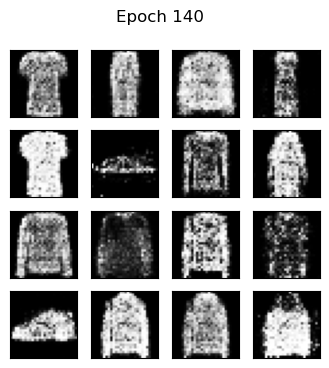

Epoch [141/150], Step [100/938], D_loss: 1.3232693076133728, G_loss: 0.83213871717453
Epoch [141/150], Step [200/938], D_loss: 1.3685179352760315, G_loss: 0.7932970523834229
Epoch [141/150], Step [300/938], D_loss: 1.4062074422836304, G_loss: 0.6923171281814575
Epoch [141/150], Step [400/938], D_loss: 1.3335574865341187, G_loss: 0.8392865657806396
Epoch [141/150], Step [500/938], D_loss: 1.448746681213379, G_loss: 0.7712564468383789
Epoch [141/150], Step [600/938], D_loss: 1.379882574081421, G_loss: 0.8991696238517761
Epoch [141/150], Step [700/938], D_loss: 1.3795245885849, G_loss: 0.8258873224258423
Epoch [141/150], Step [800/938], D_loss: 1.33063805103302, G_loss: 0.8898543119430542
Epoch [141/150], Step [900/938], D_loss: 1.3218454718589783, G_loss: 1.006246566772461
Epoch [142/150], Step [100/938], D_loss: 1.2621511816978455, G_loss: 1.0215380191802979
Epoch [142/150], Step [200/938], D_loss: 1.4741525650024414, G_loss: 0.7570834755897522
Epoch [142/150], Step [300/938], D_loss: 1

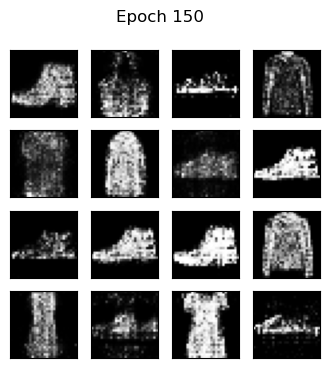

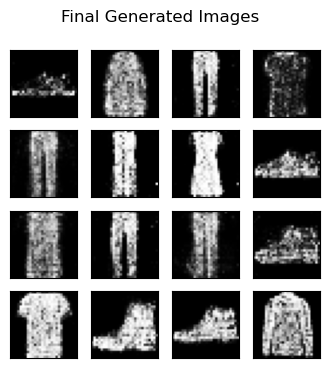

In [3]:
data_loader = trainLoader
# Generator definition

class Generator(nn.Module):

    def __init__(self, noise_dimension=100):

        super(Generator, self).__init__()

        self.model = nn.Sequential(

            nn.Linear(noise_dimension, 256),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 512),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(512, 1024),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(1024, 784),

            nn.Tanh(),

        )
 
    def forward(self, z):

        return self.model(z).view(-1, 1, 28, 28)
 
# Discriminator definition

class Discriminator(nn.Module):

    def __init__(self):

        super(Discriminator, self).__init__()

        self.model = nn.Sequential(

            nn.Linear(784, 512),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(512, 256),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 1),

            nn.Sigmoid(),

        )
 
    def forward(self, img):

        flattened = img.view(img.size(0), -1)

        return self.model(flattened)
    
    
 
# Initialize generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)
 
# Optimizers
lr = 0.0002
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)
 
# Loss function
criterion = nn.BCELoss()
 
# Number of epochs and noise dimension
n_epochs = 150
noise_dim = 100
 
# Function to visualize generated images
def show_generated_images(generator, noise_dimension, num_images=16, title=""):
    noise = torch.randn(num_images, noise_dimension, device=device)
    with torch.no_grad():
        generated_images = generator(noise).cpu().numpy()
    generated_images = np.reshape(generated_images, newshape=(-1, 28, 28))
    fig, axes = plt.subplots(4, 4, figsize=(4, 4), sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), generated_images):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.imshow(img.squeeze(), cmap='gray')
    plt.suptitle(title)
    plt.show()
 
# Training loop
for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(trainLoader):
 
        # Move images to the appropriate device
        imgs = imgs.to(device)
 
        # Train Discriminator
        optimizer_D.zero_grad()
 
        real_labels = torch.ones(imgs.size(0), 1, device=device)
        fake_labels = torch.zeros(imgs.size(0), 1, device=device)
 
        real_loss = criterion(discriminator(imgs), real_labels)
        real_loss.backward()
 
        noise = torch.randn(imgs.size(0), noise_dim, device=device)
        fake_imgs = generator(noise).detach()
        fake_loss = criterion(discriminator(fake_imgs), fake_labels)
        fake_loss.backward()
 
        optimizer_D.step()
 
        # Train Generator
        optimizer_G.zero_grad()
 
        gen_labels = torch.ones(imgs.size(0), 1, device=device)
        loss_G = criterion(discriminator(generator(noise)), gen_labels)
        loss_G.backward()
 
        optimizer_G.step()
 
        # Logging
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{n_epochs}], Step [{i+1}/{len(trainLoader)}], D_loss: {real_loss.item() + fake_loss.item()}, G_loss: {loss_G.item()}")
 
    # Visualize images periodically
    if (epoch + 1) % 10 == 0:
        show_generated_images(generator, noise_dim, title=f"Epoch {epoch + 1}")
 
# Final visualization
show_generated_images(generator, noise_dim, title="Final Generated Images")


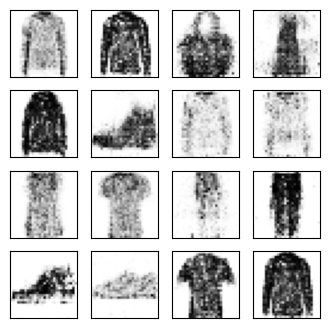

In [15]:
num_images = 16
noise_dimension = 100
noise = torch.randn(num_images, noise_dimension, device=device)
with torch.no_grad():
    generated_images = generator(noise).cpu().numpy()
generated_images = np.reshape(generated_images, newshape=(-1, 28, 28))
fig, axes = plt.subplots(4, 4, figsize=(4, 4), sharey=True, sharex=True)
for ax, img in zip(axes.flatten(), generated_images):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(img.squeeze(), cmap='gray_r')
plt.show()